<a href="https://colab.research.google.com/github/rybakinaea/Neuron_DZ/blob/main/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D0%B4%D0%B5%D0%B6%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ качества работы нейронной сети для распознавания моделей одежды в Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (Файл -> Создать копию на Диске). Свою копию вы сможете изменять и запускать.


In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [3]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Список с названиями классов

In [4]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

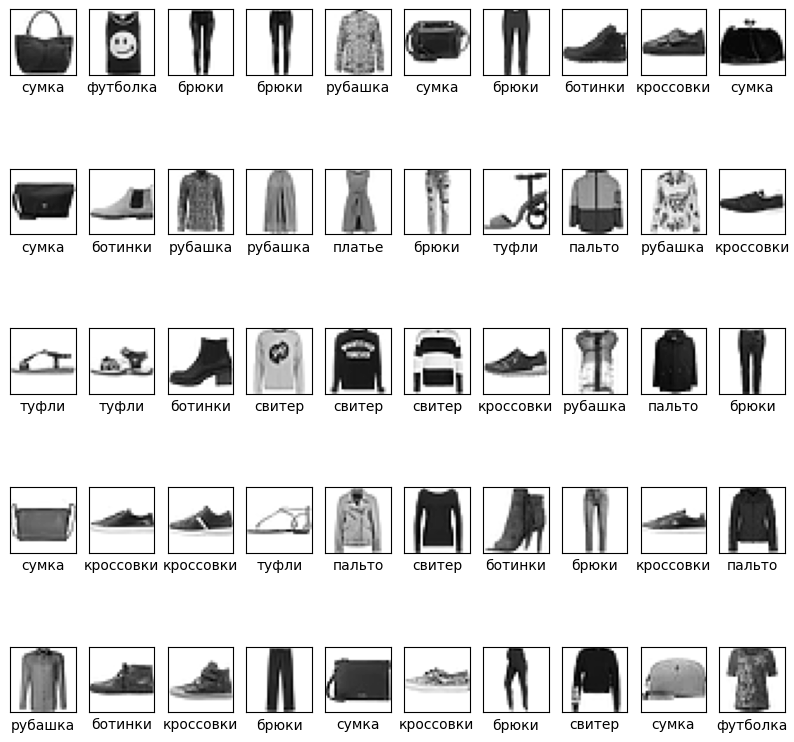

In [5]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [7]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255
x_test = x_test / 255

**Работа с правильными ответами**

In [8]:
n = 0

In [9]:
print(y_train[n])

9


**Преобразуем метки в формат one hot encoding**

In [10]:
y_train = utils.to_categorical(y_train, 10)

In [11]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [12]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [13]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [14]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636010 (2.43 MB)
Trainable params: 636010 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Обучаем нейронную сеть

In [15]:
history = model.fit(x_train, y_train,
                    batch_size=400,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
120/120 [==============================] - 3s 6ms/step - loss: 0.5950 - accuracy: 0.7961 - val_loss: 0.4458 - val_accuracy: 0.8438
Epoch 2/20
120/120 [==============================] - 0s 4ms/step - loss: 0.4114 - accuracy: 0.8559 - val_loss: 0.4073 - val_accuracy: 0.8535
Epoch 3/20
120/120 [==============================] - 1s 5ms/step - loss: 0.3734 - accuracy: 0.8674 - val_loss: 0.3688 - val_accuracy: 0.8702
Epoch 4/20
120/120 [==============================] - 1s 5ms/step - loss: 0.3366 - accuracy: 0.8800 - val_loss: 0.3571 - val_accuracy: 0.8733
Epoch 5/20
120/120 [==============================] - 1s 4ms/step - loss: 0.3185 - accuracy: 0.8848 - val_loss: 0.3368 - val_accuracy: 0.8788
Epoch 6/20
120/120 [==============================] - 1s 4ms/step - loss: 0.2989 - accuracy: 0.8922 - val_loss: 0.3389 - val_accuracy: 0.8772
Epoch 7/20
120/120 [==============================] - 0s 4ms/step - loss: 0.2885 - accuracy: 0.8944 - val_loss: 0.3323 - val_accuracy: 0.8821
Epoch 

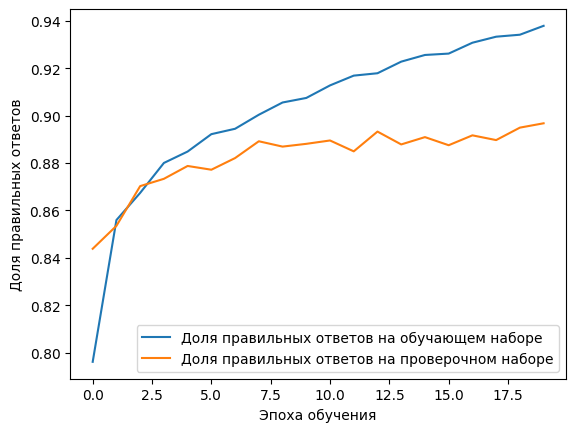

In [16]:
plt.plot(history.history['accuracy'],
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

## Сохраняем нейронную сеть для последующего использования

In [17]:
model.save('fashion_mnist_dense.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [18]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3210 - accuracy: 0.8903


In [19]:
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля правильных ответов на тестовых данных, в процентах: 89.03


## Используем сеть для распознавания предметов одежды

In [20]:
n_rec = 497

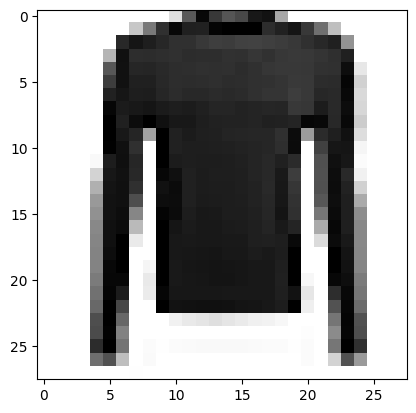

In [21]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [22]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [23]:
prediction = model.predict(x)

1/1 [==============================] - 0s 98ms/step


**Печатаем результаты распознавания**

In [24]:
prediction

array([[2.9961157e-05, 1.1881239e-07, 9.9740607e-01, 2.9215066e-09,
        1.8009838e-03, 1.4256424e-11, 7.2669896e-04, 1.6082214e-11,
        3.6084810e-05, 3.4481786e-09]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [25]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])


Номер класса: 2
Название класса: свитер


**Печатаем правильный ответ**

In [26]:
label = np.argmax(y_test[n_rec])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 2
Название класса: свитер
